# Support vector machines

**Support vector machines (SVMs)** são um conjunto de métodos de aprendizado de máquina supervisionados usados para classificação, regressão.

As vantagens do SVM são:
 * Eficácia em espaços dimensionais elevados.
 * Ainda é eficaz nos casos em que o número de dimensões é maior que o número de amostras.
 * Usa um subconjunto de pontos de treinamento na função de decisão (chamados vetores de suporte), portanto, também é eficiente em termos de memória.


In [4]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics

PATH = './data_set/letter-recognition.data'

colums = [
    'lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
    'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
    'yegvx'
]

df = pd.read_csv(PATH, names=colums)

rangeAccuracy = []

for ite in range(1,161):
    training_points = np.array(df[:(ite*100)].drop(['lettr'], 1))
    training_labels = np.array(df[:(ite*100)]['lettr'])

    clf = SVC()
    clf.fit(training_points, training_labels) 

    test_points = np.array(df[16000:].drop(['lettr'], 1))
    test_labels = np.array(df[16000:]['lettr'])

    expected = test_labels
    predicted = clf.predict(test_points)

    accuracy = clf.score(test_points, test_labels)

    rangeAccuracy.append(accuracy)

# Acurácia

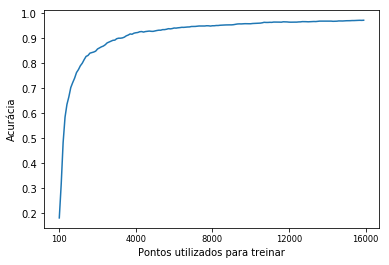

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

xticks = ['100', '4000', '8000', '12000', '16000']

plt.plot(rangeAccuracy)
plt.xlabel('Pontos utilizados para treinar')
plt.ylabel('Acurácia')
plt.xticks(range(0, 161, 40), xticks, size='small')
plt.show()

# Relatório de Precision, Recall e F1-score

In [8]:
print('Final general accuracy: ' + str(accuracy))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Final general accuracy: 0.97225
             precision    recall  f1-score   support

          A       0.99      0.99      0.99       156
          B       0.93      0.99      0.96       136
          C       0.98      0.96      0.97       142
          D       0.93      0.98      0.96       167
          E       0.96      0.97      0.97       152
          F       0.98      0.97      0.97       153
          G       0.98      0.97      0.98       164
          H       0.91      0.89      0.90       151
          I       0.98      0.96      0.97       165
          J       0.95      0.97      0.96       148
          K       0.94      0.97      0.95       146
          L       1.00      0.96      0.98       157
          M       0.97      0.99      0.98       144
          N       0.99      0.95      0.97       166
          O       0.97      0.99      0.98       139
          P       0.99      0.95      0.97       168
          Q       0.99      0.98      0.99       168
          R  